In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt




#Define dtypes to cast on each column.
dtypes = { "Make": "category",
          "Model":"category",
          "Vehicle Class":"category",
          "Engine Size(L)":"float",
          "Cylinders":"int",
          "Transmission":"category",
          "Fuel Type":"category",
          "Fuel Consumption City (L/100 km)":np.float64,
          "Fuel Consumption Hwy (L/100 km)":np.float64,
          "Fuel Consumption Comb (L/100 km)":np.float64,
          "Fuel Consumption Comb (mpg)":np.float64,
          "CO2 Emissions(g/km)":np.float64}

Dataset = pd.read_csv("CO2Emission.csv", 
                      sep=';', dtype = dtypes, decimal = ",")

n_rows:int  = Dataset.shape[0]



target_var: str = "CO2 Emissions(g/km)"
target_var_discr: str = "CO2 Emissions(g/km)_disc"

#Take the target variable column and  change its dimension to 2.
target_var_col = Dataset[target_var].to_numpy().reshape(-1,1)




### Statystyka opisowa zmiennych kategorycznych.


### 1) Częstość występowania klas.

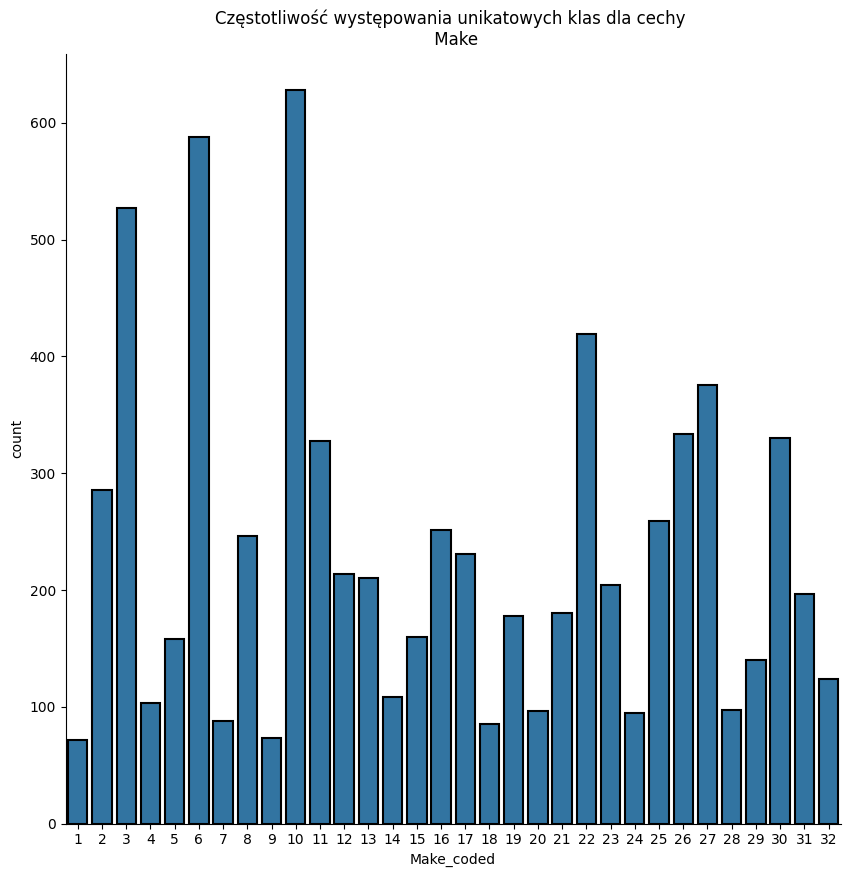

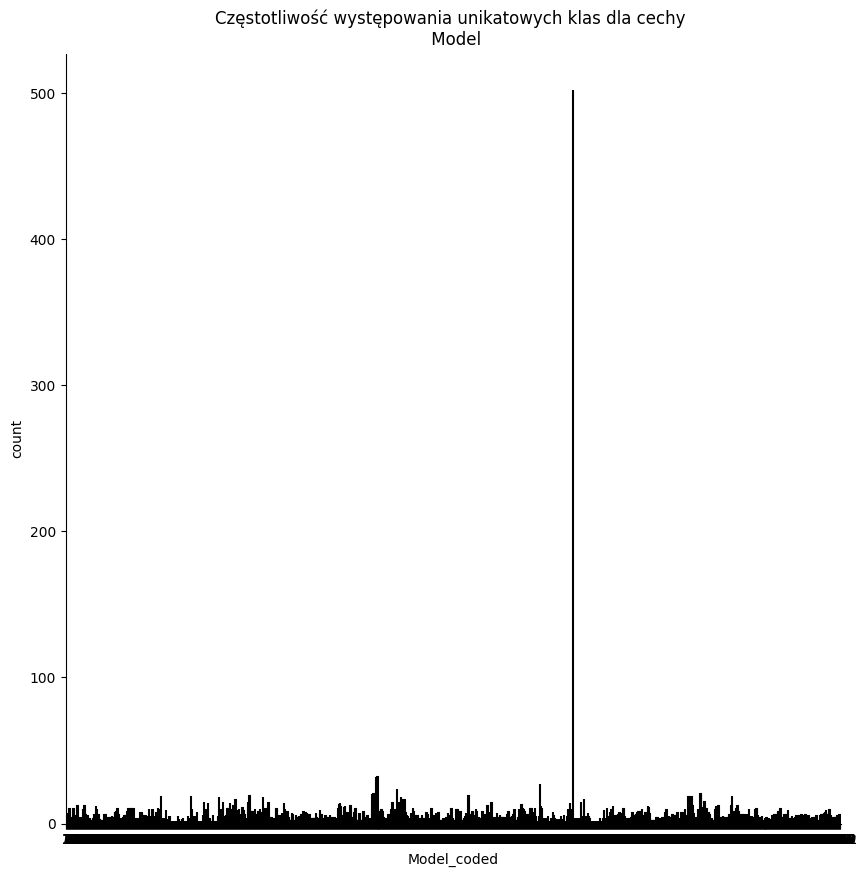

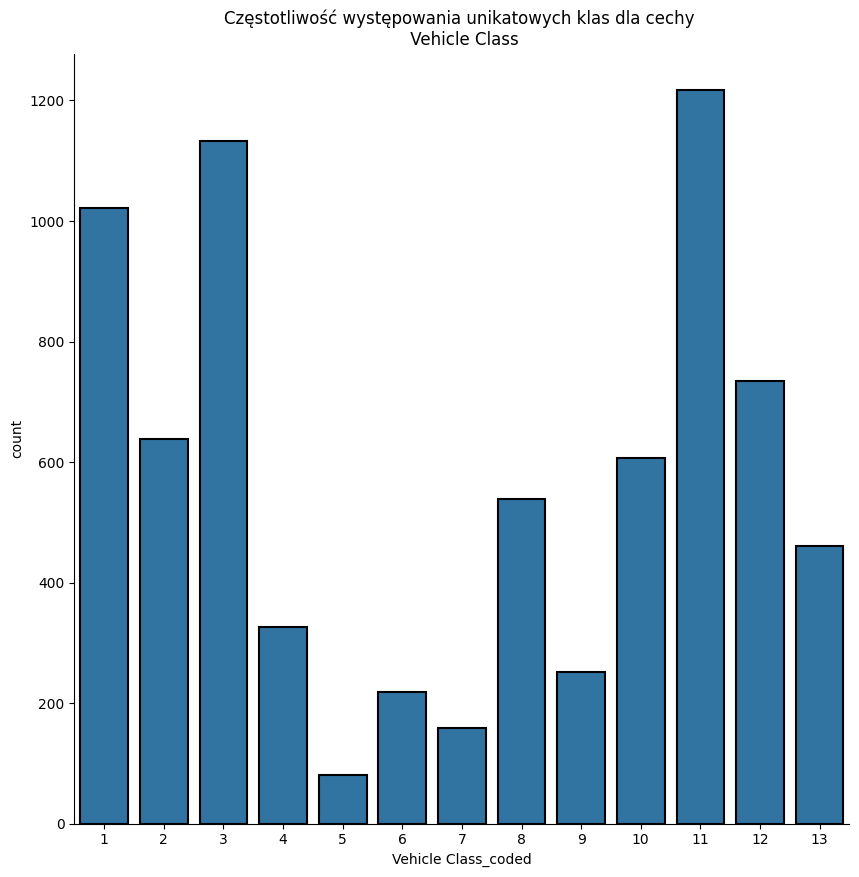

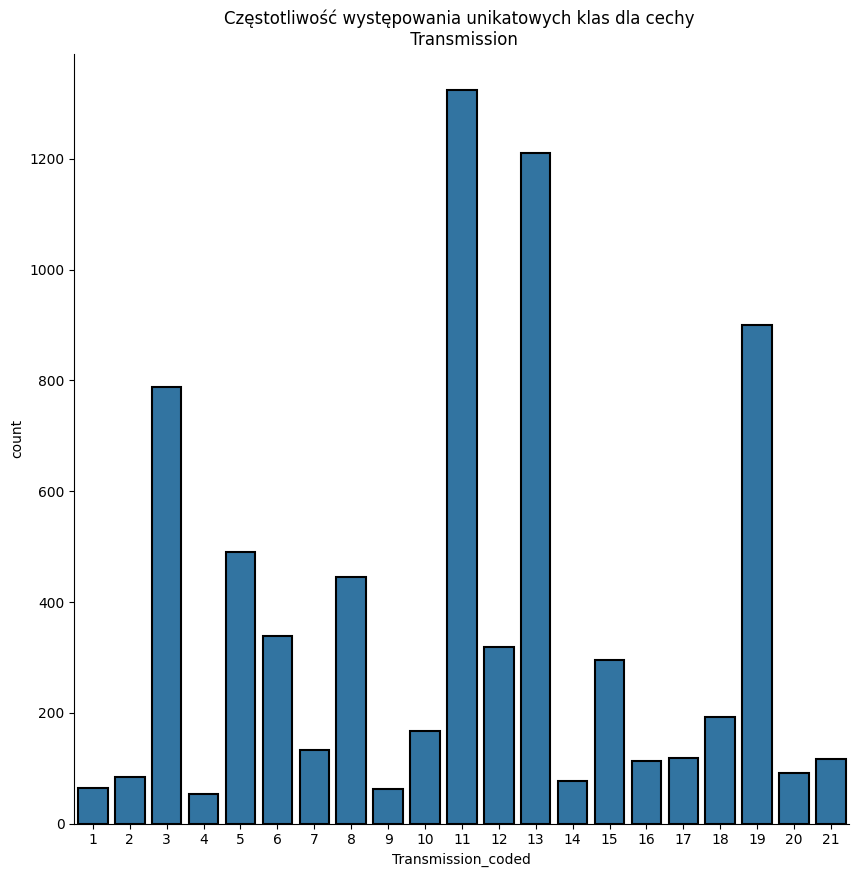

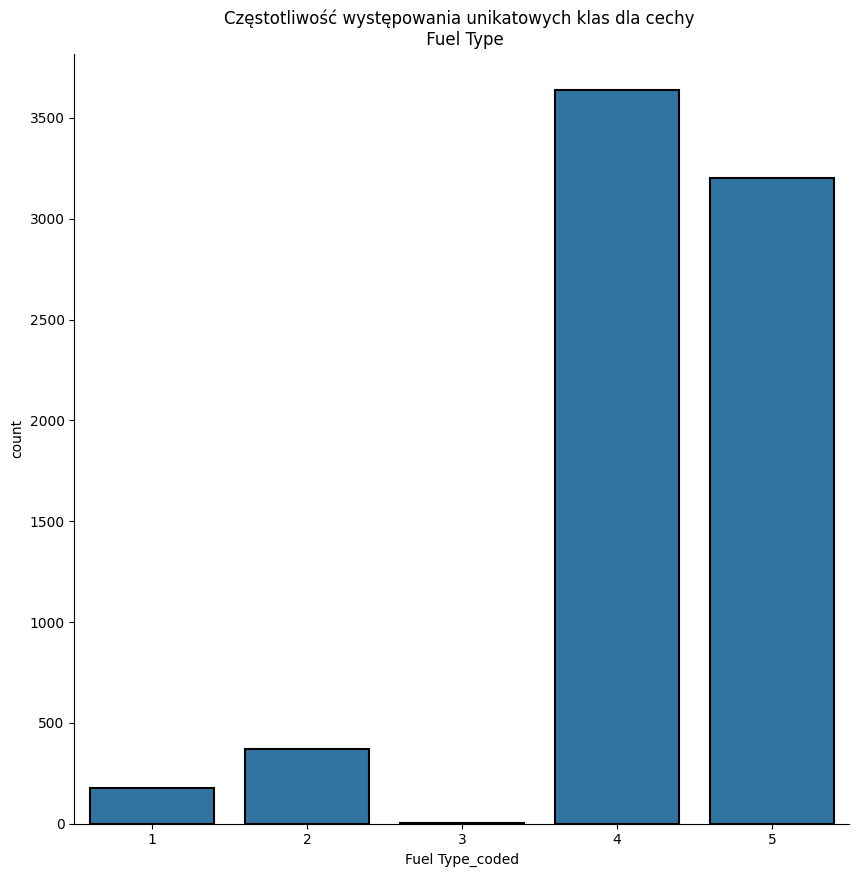

In [3]:

def UpiekszWykres(axes: plt.axes, CatFeature:str) -> None:
    #Ustaw ładny tytuł.
    axes.set_title(f"Częstotliwość występowania unikatowych klas dla cechy \n {CatFeature}")
    
    axes.spines[["top","right"]].set_visible(False)
    
    

CatFeatures: list[str] = Dataset.select_dtypes(include = "category").columns



for CatFeature in CatFeatures:
    
    CatFeature_Figure = plt.figure(num = CatFeature,
                                   figsize = (10, 10))
    CatFeature_axes = CatFeature_Figure.add_subplot()
    
    HistogramSet = Dataset[CatFeature].value_counts(sort = False).reset_index()

    #Policz próg częstotliowści poniżej którego klasa będzie interpretowana jako "bardzo rzadka".
    frequen_threshold: float = np.quantile(HistogramSet['count'], q = 0.25)



    #Aggregate the rarest class (that is - those whose frequency is less than frequen_threshold)

    HistogramSet[CatFeature] = HistogramSet.apply(func = 
                                         lambda x: "Other" if x["count"] < frequen_threshold else  x[CatFeature], 
                                         axis = 1)
    
    #The sum functions effectively deals with the class "Other". For other classes, the result of sum
    #function is just the frequency of a one class.
    HistogramSet = HistogramSet.groupby(by = CatFeature, 
                                        as_index = False).agg(func = {"count":"sum"})
    
    HistogramSet[f"{CatFeature}_coded"] = np.arange(1, len(HistogramSet)+1, step = 1, dtype = np.int16)


    #Create the barplot.
    sns.barplot(data = HistogramSet, 
    x = f"{CatFeature}_coded", y = "count", ax = CatFeature_axes, linewidth = 1.5, edgecolor = "black")

    UpiekszWykres(CatFeature_axes, CatFeature)

  




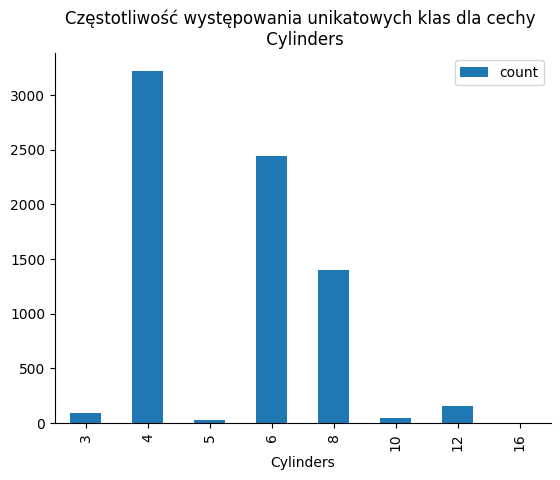

In [4]:

axes = Dataset['Cylinders'].value_counts().reset_index().sort_values(by = "Cylinders").plot.bar(x = "Cylinders", y = "count")


UpiekszWykres(axes = axes, CatFeature = "Cylinders")

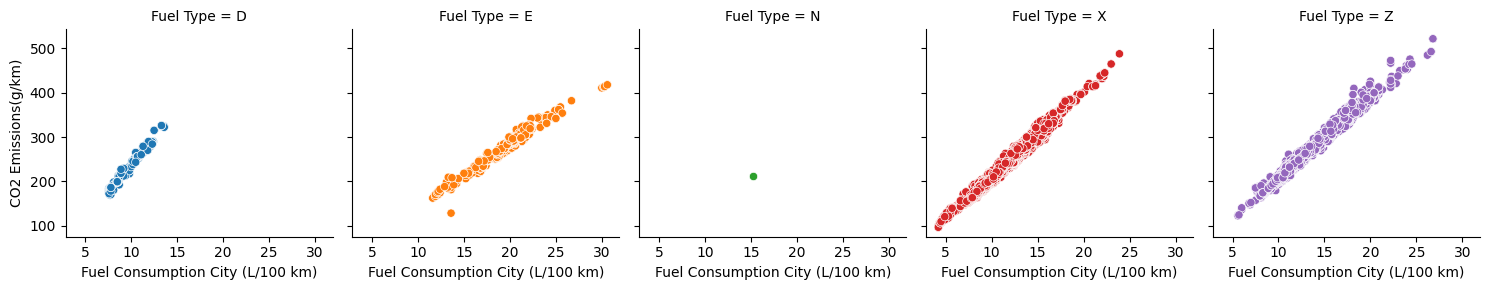

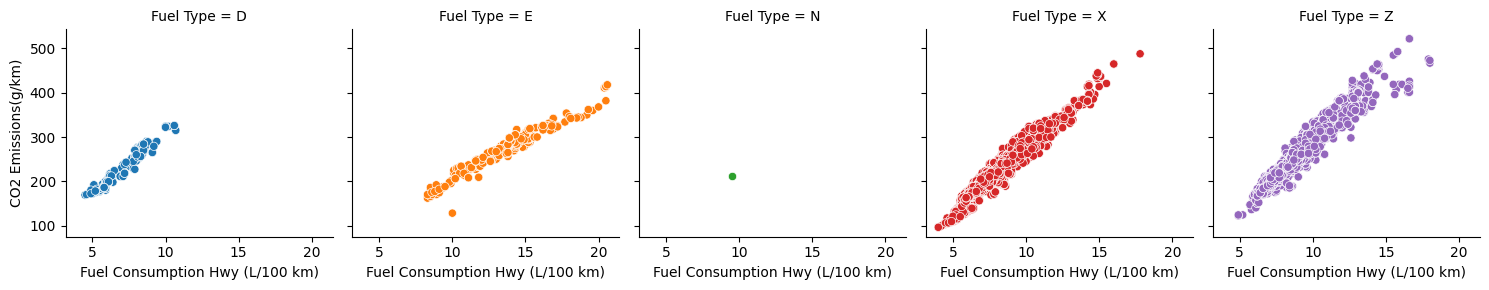

In [8]:
import seaborn as sns



#Stwórz siatkę wykresów dla zmiennej x Zuzycie paliwa na mieście.
sns.FacetGrid(data = Dataset, col = "Fuel Type").map_dataframe(sns.scatterplot, 
                        data = Dataset, 
                        x="Fuel Consumption City (L/100 km)",  
                        y = "CO2 Emissions(g/km)", 
                        hue = "Fuel Type")


#Stwórz siatkę wykresów dla zmiennej x Zuzycie paliwa na autostradzie.
sns.FacetGrid(data = Dataset, col = "Fuel Type").map_dataframe(sns.scatterplot, 
                        data = Dataset, 
                        x="Fuel Consumption Hwy (L/100 km)",  
                        y = "CO2 Emissions(g/km)", 
                        hue = "Fuel Type")


